<a href="https://colab.research.google.com/github/meryzennn/JKN-Mobile-Sentiment-Analysis/blob/main/sentimen_knn%2Csvm%2Cnaive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SCRAPING DATA***
---



In [ ]:
! pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app,reviews
import pandas as pd
import datetime

In [ ]:
from google_play_scraper import reviews, Sort

app_id = 'app.bpjs.mobile'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Gagal mengambil ulasan.")


Jumlah ulasan: 10000
Contoh ulasan:
{'reviewId': 'ca0f6e80-a008-4243-9e91-550c7a907768', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'bagus', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '4.12.0', 'at': datetime.datetime(2025, 5, 23, 8, 27, 38), 'replyContent': None, 'repliedAt': None, 'appVersion': '4.12.0'}


In [ ]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_mobile_jkn.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']
        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

# Panggil fungsi ekspor
export_to_csv(reviews)


Data berhasil diekspor ke 'hasil_scraper_ulasan_app_mobile_jkn.csv'


In [ ]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_mobile_jkn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [ ]:
data.head(20)

,Review ID,Username,Rating,Review Text,Date
0,ca0f6e80-a008-4243-9e91-550c7a907768,Pengguna Google,5,bagus,2025-05-23 08:27:38
1,2f39355c-022b-45d1-97ce-15246885efc9,Pengguna Google,5,ok,2025-05-23 08:25:02
2,031934de-ef41-42e9-b447-0bc5860bb79d,Pengguna Google,5,sangggat membantu,2025-05-23 08:15:45
3,d62a3dce-e9bf-436a-b437-f3a5df05dada,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,2025-05-23 08:13:11
4,9a35f6c4-a99e-4760-be01-818019ac9648,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,2025-05-23 08:12:25
5,19ab3b4e-3f24-44ad-96b3-35c0f9c5073a,Pengguna Google,1,"setiap log in selalu dibilang salah NIK, padah...",2025-05-23 08:11:03
6,f8043125-32ee-4d55-884b-c9d9744ed8bf,Pengguna Google,1,mau pindah faskes di klik provinsi tdk bisa yu...,2025-05-23 07:59:18
7,493ea242-d676-4041-950f-10f1841f8ac3,Pengguna Google,5,ok,2025-05-23 07:55:26
8,679fbb6a-f64a-44d0-9b89-05c668522f3f,Pengguna Google,5,membantu mempercepat pengurusan,2025-05-23 07:52:37
9,af188d1c-1205-4c1b-9d76-836e5f106433,Pengguna Google,5,ok,2025-05-23 07:51:50


# ***PREPROCESSING DATA***
---



In [ ]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_mobile_jkn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [ ]:
data.head(10)

,Review ID,Username,Rating,Review Text,Date
0,ca0f6e80-a008-4243-9e91-550c7a907768,Pengguna Google,5,bagus,2025-05-23 08:27:38
1,2f39355c-022b-45d1-97ce-15246885efc9,Pengguna Google,5,ok,2025-05-23 08:25:02
2,031934de-ef41-42e9-b447-0bc5860bb79d,Pengguna Google,5,sangggat membantu,2025-05-23 08:15:45
3,d62a3dce-e9bf-436a-b437-f3a5df05dada,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,2025-05-23 08:13:11
4,9a35f6c4-a99e-4760-be01-818019ac9648,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,2025-05-23 08:12:25
5,19ab3b4e-3f24-44ad-96b3-35c0f9c5073a,Pengguna Google,1,"setiap log in selalu dibilang salah NIK, padah...",2025-05-23 08:11:03
6,f8043125-32ee-4d55-884b-c9d9744ed8bf,Pengguna Google,1,mau pindah faskes di klik provinsi tdk bisa yu...,2025-05-23 07:59:18
7,493ea242-d676-4041-950f-10f1841f8ac3,Pengguna Google,5,ok,2025-05-23 07:55:26
8,679fbb6a-f64a-44d0-9b89-05c668522f3f,Pengguna Google,5,membantu mempercepat pengurusan,2025-05-23 07:52:37
9,af188d1c-1205-4c1b-9d76-836e5f106433,Pengguna Google,5,ok,2025-05-23 07:51:50


In [ ]:
df = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-05-23 08:27:38,Pengguna Google,5,bagus
1,2025-05-23 08:25:02,Pengguna Google,5,ok
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
df.drop_duplicates(subset = "Review Text", keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7259 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         7259 non-null   object
 1   Username     7259 non-null   object
 2   Rating       7259 non-null   int64 
 3   Review Text  7259 non-null   object
dtypes: int64(1), object(3)
memory usage: 283.6+ KB


**WORDCLOUD SEBELUM PREPROCESSING**

---



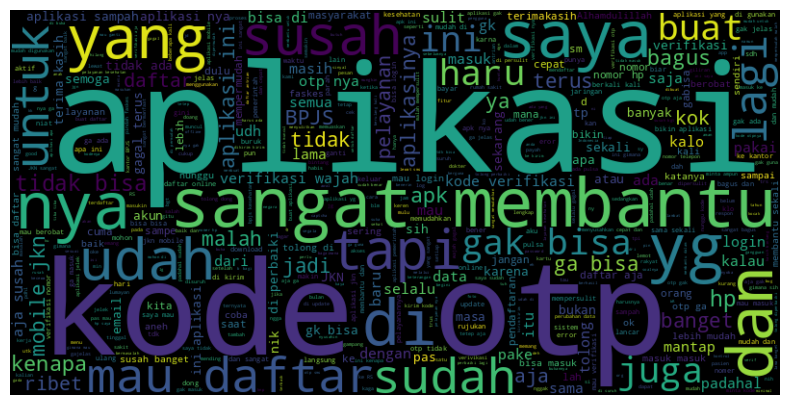

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '…', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


**FREKUENSI KATA**

---



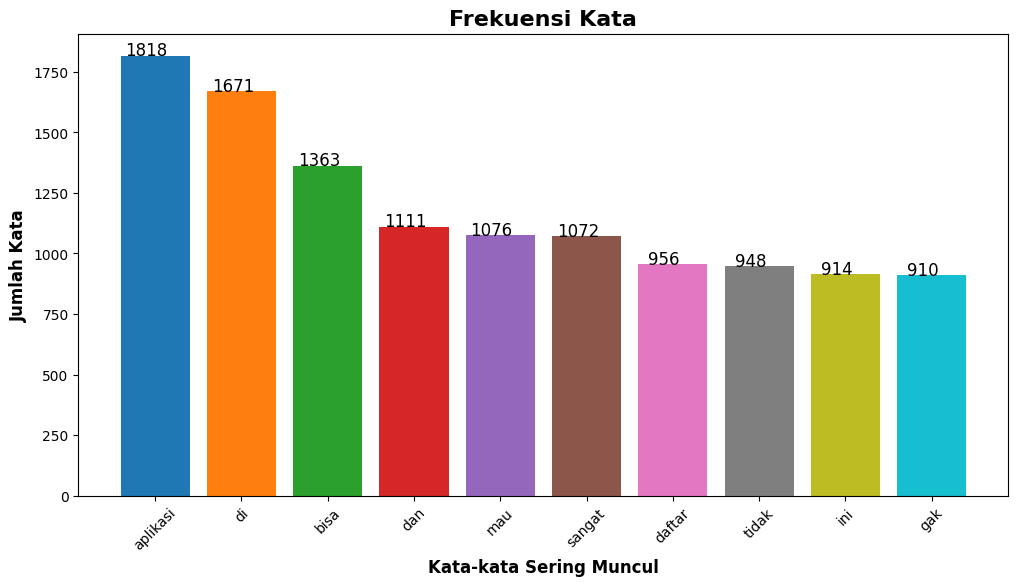

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(df['Review Text'])

tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()


**PROSES CLEANING**

---



In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U00002702-\U000027B0"  # Additional emoticons
            u"\U000024C2-\U0001F251"  # flags
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^A-Za-z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)


,Date,Username,Rating,Review Text,cleaning
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan
5,2025-05-23 08:11:03,Pengguna Google,1,"setiap log in selalu dibilang salah NIK, padah...",setiap log in selalu dibilang salah NIK padaha...
6,2025-05-23 07:59:18,Pengguna Google,1,mau pindah faskes di klik provinsi tdk bisa yu...,mau pindah faskes di klik provinsi tdk bisa yu...
8,2025-05-23 07:52:37,Pengguna Google,5,membantu mempercepat pengurusan,membantu mempercepat pengurusan
10,2025-05-23 07:47:16,Pengguna Google,5,mantap,mantap
11,2025-05-23 07:35:48,Pengguna Google,1,Tolong tambahkan fitur menonaktifkan bpjs. kar...,Tolong tambahkan fitur menonaktifkan bpjs karn...


**PROSES CASE FOLDING**

---



In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus,bagus
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok,ok
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu,sangggat membantu
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa,sdh perna dftar eh cba msuk lagi udah nda bisa
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan


**NORMALISASI KATA**

---



In [ ]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                    # replaced_words.append('<karakter eksplisit>')
                    # kalimat_baku.append(word)
            else:
                replaced_words.append(word)
                kalimat_baku.append(word)
        replaced_text = " ".join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [ ]:
# Baca dataset
data = pd.DataFrame(df[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding']])
data.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus,bagus
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok,ok
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu,sangggat membantu
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa,sdh perna dftar eh cba msuk lagi udah nda bisa
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan


In [ ]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

data.head(100)

df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']])
df.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus,bagus,bagus
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok,ok,ok
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu,sangggat membantu,sangggat membantu
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa,sdh perna dftar eh cba msuk lagi udah nda bisa,sudah pernah dftar eh coba masuk lagi sudah in...
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan


**TOKENIZE**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus,bagus,bagus,[bagus]
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok,ok,ok,[ok]
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu,sangggat membantu,sangggat membantu,"[sangggat, membantu]"
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa,sdh perna dftar eh cba msuk lagi udah nda bisa,sudah pernah dftar eh coba masuk lagi sudah in...,"[sudah, pernah, dftar, eh, coba, masuk, lagi, ..."
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,"[alhamdulillah, sangat, mudah, di, gunakan]"


**STOPWROD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus,bagus,bagus,[bagus],[bagus]
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok,ok,ok,[ok],[ok]
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu,sangggat membantu,sangggat membantu,"[sangggat, membantu]","[sangggat, membantu]"
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa,sdh perna dftar eh cba msuk lagi udah nda bisa,sudah pernah dftar eh coba masuk lagi sudah in...,"[sudah, pernah, dftar, eh, coba, masuk, lagi, ...","[dftar, eh, coba, masuk, indak]"
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,"[alhamdulillah, sangat, mudah, di, gunakan]","[alhamdulillah, mudah]"


**PROSES STEAMING DATA**

---



In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# Terapkan stemming ke kolom 'stopword removal'
df['stemming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

# Tampilkan 5 data teratas
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus,bagus,bagus,[bagus],[bagus],bagus
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok,ok,ok,[ok],[ok],ok
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu,sangggat membantu,sangggat membantu,"[sangggat, membantu]","[sangggat, membantu]",sangggat bantu
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa,sdh perna dftar eh cba msuk lagi udah nda bisa,sudah pernah dftar eh coba masuk lagi sudah in...,"[sudah, pernah, dftar, eh, coba, masuk, lagi, ...","[dftar, eh, coba, masuk, indak]",dftar eh coba masuk indak
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,"[alhamdulillah, sangat, mudah, di, gunakan]","[alhamdulillah, mudah]",alhamdulillah mudah


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7259 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7259 non-null   object
 1   Username          7259 non-null   object
 2   Rating            7259 non-null   int64 
 3   Review Text       7259 non-null   object
 4   cleaning          7259 non-null   object
 5   case_folding      7259 non-null   object
 6   normalisasi       7259 non-null   object
 7   tokenize          7259 non-null   object
 8   stopword removal  7259 non-null   object
 9   stemming_data     7259 non-null   object
dtypes: int64(1), object(9)
memory usage: 881.9+ KB


**PROSES HAPUS DATA BERNILAI KOSONG (NaN)**

---



In [ ]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7259 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7259 non-null   object
 1   Username          7259 non-null   object
 2   Rating            7259 non-null   int64 
 3   Review Text       7259 non-null   object
 4   cleaning          7259 non-null   object
 5   case_folding      7259 non-null   object
 6   normalisasi       7259 non-null   object
 7   tokenize          7259 non-null   object
 8   stopword removal  7259 non-null   object
 9   stemming_data     7259 non-null   object
dtypes: int64(1), object(9)
memory usage: 881.9+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



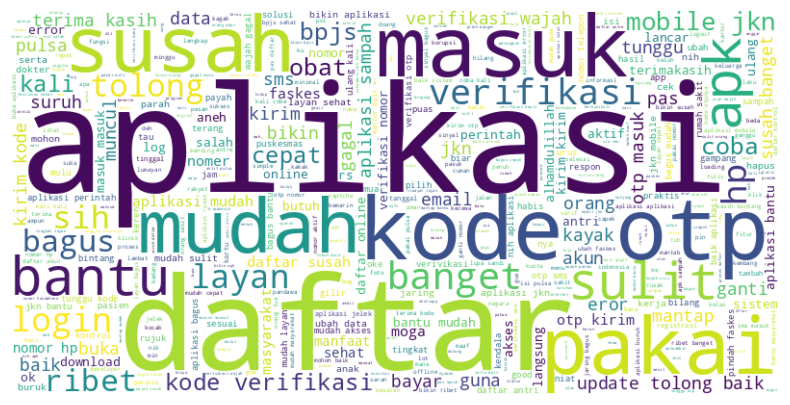

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
# df['stemming_data'] = df['stemming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['stemming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


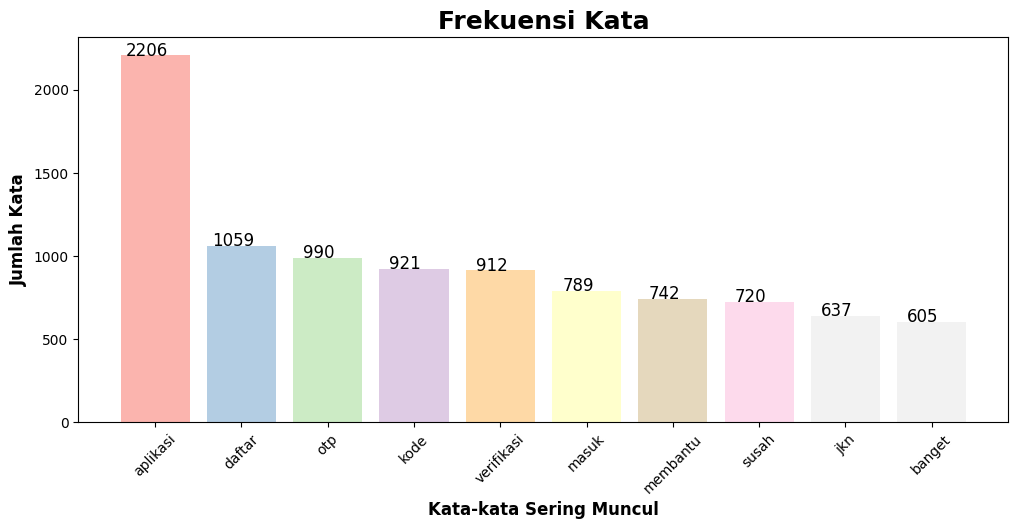

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Convert the list of words in 'stopword removal' to strings before joining
text = ' '.join([' '.join(words) for words in df["stopword removal"]])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'sih'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata Sering Muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kata', fontsize=12, fontweight='bold')
plt.title('Frekuensi Kata', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()


In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# ***PELEBELAN DATA***

---



In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_Preprocessing_Data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7259 non-null   object
 1   Username          7259 non-null   object
 2   Rating            7259 non-null   int64 
 3   Review Text       7259 non-null   object
 4   cleaning          7232 non-null   object
 5   case_folding      7232 non-null   object
 6   normalisasi       7227 non-null   object
 7   tokenize          7259 non-null   object
 8   stopword removal  7259 non-null   object
 9   stemming_data     7190 non-null   object
dtypes: int64(1), object(9)
memory usage: 567.2+ KB


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-05-23 08:27:38,Pengguna Google,5,bagus,bagus,bagus,bagus,['bagus'],['bagus'],bagus
1,2025-05-23 08:25:02,Pengguna Google,5,ok,ok,ok,ok,['ok'],['ok'],ok
2,2025-05-23 08:15:45,Pengguna Google,5,sangggat membantu,sangggat membantu,sangggat membantu,sangggat membantu,"['sangggat', 'membantu']","['sangggat', 'membantu']",sangggat bantu
3,2025-05-23 08:13:11,Pengguna Google,1,sdh perna dftar eh cba msuk lagi udah nda bisa.,sdh perna dftar eh cba msuk lagi udah nda bisa,sdh perna dftar eh cba msuk lagi udah nda bisa,sudah pernah dftar eh coba masuk lagi sudah in...,"['sudah', 'pernah', 'dftar', 'eh', 'coba', 'ma...","['dftar', 'eh', 'coba', 'masuk', 'indak']",dftar eh coba masuk indak
4,2025-05-23 08:12:25,Pengguna Google,5,Alhamdulillah sangat mudah di gunakan,Alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,alhamdulillah sangat mudah di gunakan,"['alhamdulillah', 'sangat', 'mudah', 'di', 'gu...","['alhamdulillah', 'mudah']",alhamdulillah mudah


In [ ]:
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7190 entries, 0 to 7258
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              7190 non-null   object
 1   Username          7190 non-null   object
 2   Rating            7190 non-null   int64 
 3   Review Text       7190 non-null   object
 4   cleaning          7190 non-null   object
 5   case_folding      7190 non-null   object
 6   normalisasi       7190 non-null   object
 7   tokenize          7190 non-null   object
 8   stopword removal  7190 non-null   object
 9   stemming_data     7190 non-null   object
dtypes: int64(1), object(9)
memory usage: 617.9+ KB


In [ ]:
data = pd.DataFrame(data[['stemming_data', 'Rating']])
data.head(5)

,stemming_data,Rating
0,bagus,5
1,ok,5
2,sangggat bantu,5
3,dftar eh coba masuk indak,1
4,alhamdulillah mudah,5


In [ ]:
data['Sentiment'] = data['Rating'].apply(lambda x: 'Negatif' if x <= 3 else 'Positif')
data.head()


,stemming_data,Rating,Sentiment
0,bagus,5,Positif
1,ok,5,Positif
2,sangggat bantu,5,Positif
3,dftar eh coba masuk indak,1,Negatif
4,alhamdulillah mudah,5,Positif


<ipython-input-42-460eb42ca53d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


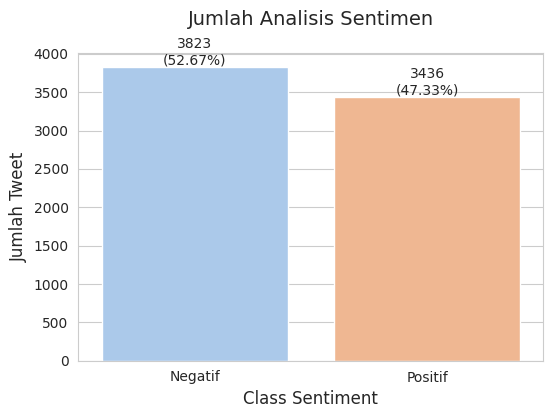

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()


In [ ]:
data.to_csv('Hasil_Labeling_Data.csv',encoding='utf8', index=False);

**WORDCLOUD**

---



In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_Labeling_Data.csv')
data.head()

,stemming_data,Rating,Sentiment
0,bagus,5,Positif
1,ok,5,Positif
2,sangggat bantu,5,Positif
3,dftar eh coba masuk indak,1,Negatif
4,alhamdulillah mudah,5,Positif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['stemming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['stemming_data'].str.cat(sep=' ')


In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        random_state=42,
        max_font_size=100,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


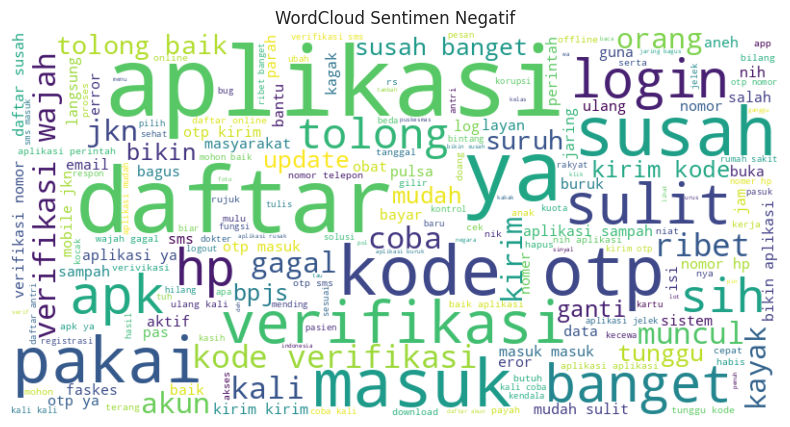

In [ ]:
#Membuat Wordcloud untuk sentimen Negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

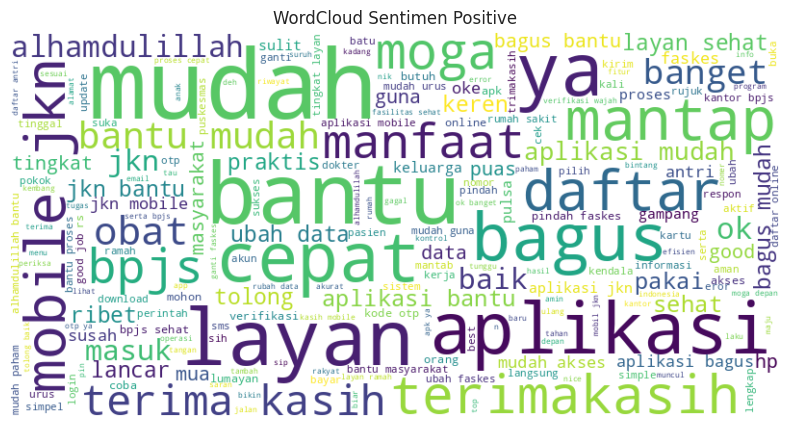

In [ ]:
#Membuat Wordcloud untuk sentimen Positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positive')

# ***SVM,KNN,NAIVE BAYES***

---



In [ ]:
import pandas as pd

file_path = 'Hasil_Labeling_Data.csv'
df = pd.read_csv(file_path)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  7190 non-null   object
 1   Rating         7259 non-null   int64 
 2   Sentiment      7259 non-null   object
dtypes: int64(1), object(2)
memory usage: 170.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Buang data yang missing pada kolom 'stemming_data'
cleaned_data = data.dropna(subset=['stemming_data'])

# Pisahkan fitur dan label
X = cleaned_data['stemming_data']
y = cleaned_data['Sentiment']

# Bagi data menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan jumlah data
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))
print('==================')

# Vektorisasi teks dengan CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Tampilkan bentuk matriks hasil vektorisasi
X_train_vec.shape, X_test_vec.shape


Jumlah data latih: 5752
Jumlah data uji: 1438


((5752, 4755), (1438, 4755))

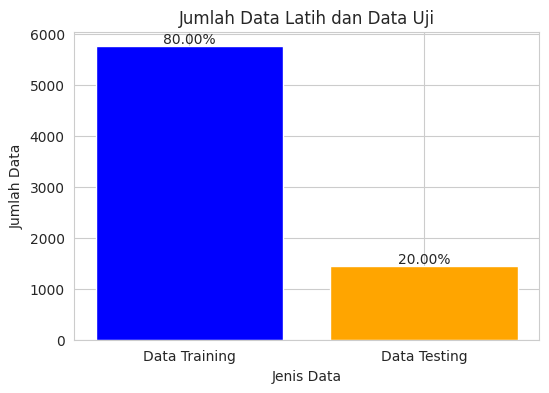

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data latih dan uji
train_size = len(X_train)
test_size = len(X_test)

# Buat bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Tambahkan persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f'{(height / (train_size + test_size)) * 100:.2f}%',
             ha='center', va='bottom')

# Tambahkan judul dan label
plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB()
}

# Latih dan evaluasi model
results = {}

for model_name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }



Confusion Matrix for SVM:


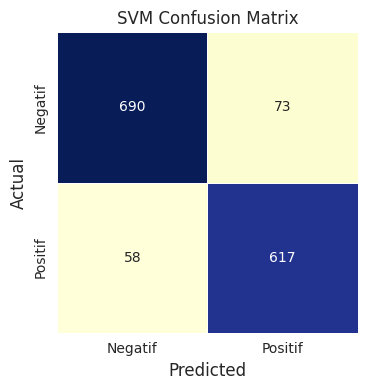


Confusion Matrix for KNN:


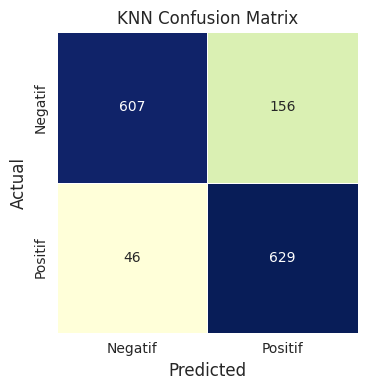


Confusion Matrix for Naive Bayes:


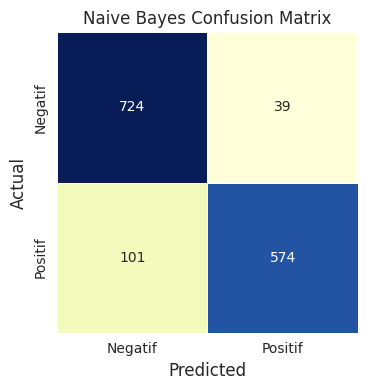

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, result in results.items():
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(
        result["confusion_matrix"],
        annot=True,
        fmt='d',
        cmap='YlGnBu',
        cbar=False,
        xticklabels=['Negatif', 'Positif'],
        yticklabels=['Negatif', 'Positif'],
        ax=ax,
        square=True,
        linewidths=0.5
    )

    print(f"\nConfusion Matrix for {model_name}:")
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)

    plt.tight_layout()
    plt.show()


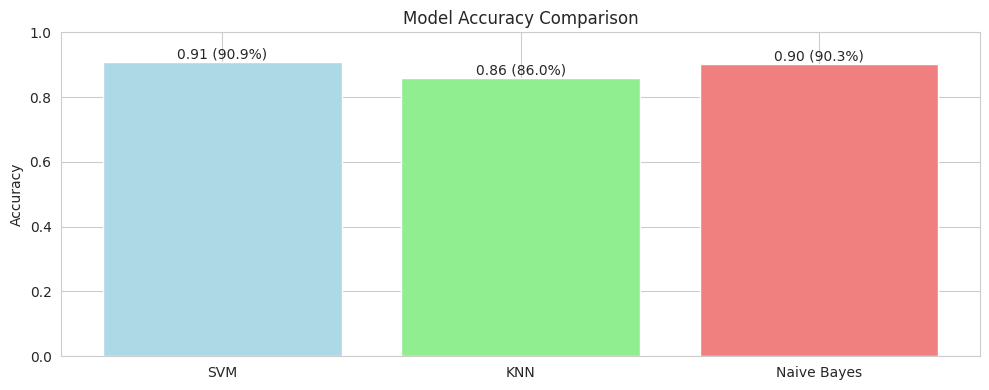

In [ ]:
import matplotlib.pyplot as plt

accuracies = {model: result["accuracy"] for model, result in results.items()}

plt.figure(figsize=(10, 4))
bars = plt.bar(
    list(accuracies.keys()),
    list(accuracies.values()),
    color=['lightblue', 'lightgreen', 'lightcoral', 'plum']
)

for bar in bars:
    accuracy = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        accuracy,
        f"{accuracy:.2f} ({accuracy * 100:.1f}%)",  # Tampilkan nilai akurasi dan persen
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Karena akurasi biasanya dalam skala 0–1
plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display

for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:")

    report_df = pd.DataFrame(result['classification_report']).transpose()

    styled_df = report_df.style.background_gradient(cmap="coolwarm")
    styled_df = styled_df.format(precision=3)

    display(styled_df)



Classification Report for SVM:


,precision,recall,f1-score,support
Negatif,0.922,0.904,0.913,763.000
Positif,0.894,0.914,0.904,675.000
accuracy,0.909,0.909,0.909,0.909
macro avg,0.908,0.909,0.909,1438.000
weighted avg,0.909,0.909,0.909,1438.000



Classification Report for KNN:


,precision,recall,f1-score,support
Negatif,0.930,0.796,0.857,763.000
Positif,0.801,0.932,0.862,675.000
accuracy,0.860,0.860,0.860,0.860
macro avg,0.865,0.864,0.859,1438.000
weighted avg,0.869,0.860,0.859,1438.000



Classification Report for Naive Bayes:


,precision,recall,f1-score,support
Negatif,0.878,0.949,0.912,763.000
Positif,0.936,0.850,0.891,675.000
accuracy,0.903,0.903,0.903,0.903
macro avg,0.907,0.900,0.902,1438.000
weighted avg,0.905,0.903,0.902,1438.000


# ***RATING***

---



In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_Labeling_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stemming_data  7190 non-null   object
 1   Rating         7259 non-null   int64 
 2   Sentiment      7259 non-null   object
dtypes: int64(1), object(2)
memory usage: 170.3+ KB


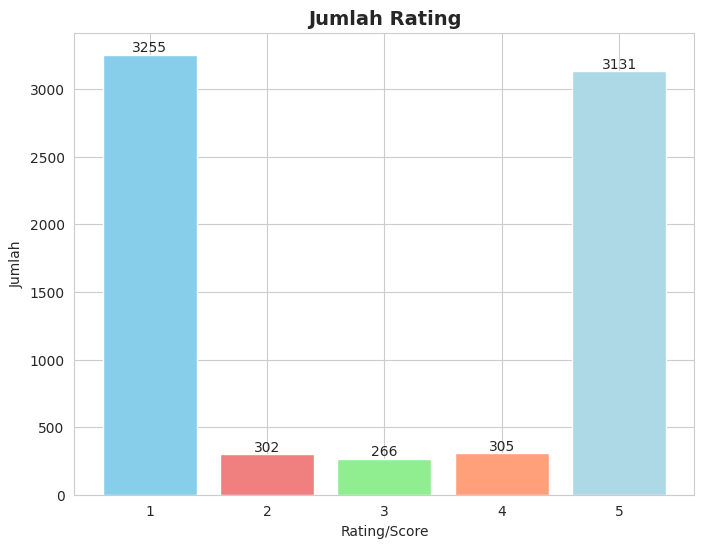

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()